<a href="https://colab.research.google.com/github/mouratsm/challenge1-data-science/blob/main/AluraStoreBr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

git remote add origin git@github.com:mouratsm/challenge1-data-science.git
git branch -M main
git push -u origin main### Importação dos dados



In [ ]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print("Faturamento por Loja:")
print(f"Loja 1: R${faturamento_loja1:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Loja 2: R${faturamento_loja2:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Loja 3: R${faturamento_loja3:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"Loja 4: R${faturamento_loja4:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

Faturamento por Loja:
Loja 1: R$1.534.509,12
Loja 2: R$1.488.459,06
Loja 3: R$1.464.025,03
Loja 4: R$1.384.497,58


                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


# 2. Vendas por Categoria


In [ ]:
categoria_loja1 = loja["Categoria do Produto"].value_counts().rename("Loja 1")
categoria_loja2 = loja2["Categoria do Produto"].value_counts().rename("Loja 2")
categoria_loja3 = loja3["Categoria do Produto"].value_counts().rename("Loja 3")
categoria_loja4 = loja4["Categoria do Produto"].value_counts().rename("Loja 4")

In [ ]:
vendas_por_categoria = pd.concat([categoria_loja1, categoria_loja2, categoria_loja3, categoria_loja4], axis=1).fillna(0).astype(int)
print(vendas_por_categoria)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()


In [ ]:
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produto_mais_vendido(df):
    contagem = df["Produto"].value_counts()
    return contagem.idxmax(), contagem.max()

mais_vendidos = []

for i, loja_df in enumerate([loja, loja2, loja3, loja4], start=1):
    nome_loja = f"Loja {i}"
    produto, quantidade = produto_mais_vendido(loja_df)
    mais_vendidos.append({
        "Loja": nome_loja,
        "Produto Mais Vendido": produto,
        "Quantidade": quantidade
    })

tabela_mais_vendidos = pd.DataFrame(mais_vendidos)

print("🟩 Produtos Mais Vendidos:")
print(tabela_mais_vendidos)



🟩 Produtos Mais Vendidos:
     Loja      Produto Mais Vendido  Quantidade
0  Loja 1               Micro-ondas          60
1  Loja 2  Iniciando em programação          65
2  Loja 3             Kit banquetas          57
3  Loja 4                  Cama box          62


In [ ]:
def produto_menos_vendido(df):
    contagem = df["Produto"].value_counts()
    return contagem.idxmin(), contagem.min()

menos_vendidos = []

for i, loja_df in enumerate([loja, loja2, loja3, loja4], start=1):
    nome_loja = f"Loja {i}"
    produto, quantidade = produto_menos_vendido(loja_df)
    menos_vendidos.append({
        "Loja": nome_loja,
        "Produto Menos Vendido": produto,
        "Quantidade": quantidade
    })

tabela_menos_vendidos = pd.DataFrame(menos_vendidos)

print("🟥 Produtos Menos Vendidos:")
print(tabela_menos_vendidos)


🟥 Produtos Menos Vendidos:
     Loja Produto Menos Vendido  Quantidade
0  Loja 1               Headset          33
1  Loja 2     Jogo de tabuleiro          32
2  Loja 3      Blocos de montar          35
3  Loja 4              Guitarra          33


# 5. Frete Médio por Loja


In [ ]:
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

In [ ]:
print(f"Loja 1 - Frete médio: R${frete_medio_loja1:.2f}")
print(f"Loja 2 - Frete médio: R${frete_medio_loja2:.2f}")
print(f"Loja 3 - Frete médio: R${frete_medio_loja3:.2f}")
print(f"Loja 4 - Frete médio: R${frete_medio_loja4:.2f}")


Loja 1 - Frete médio: R$34.69
Loja 2 - Frete médio: R$33.62
Loja 3 - Frete médio: R$33.07
Loja 4 - Frete médio: R$31.28


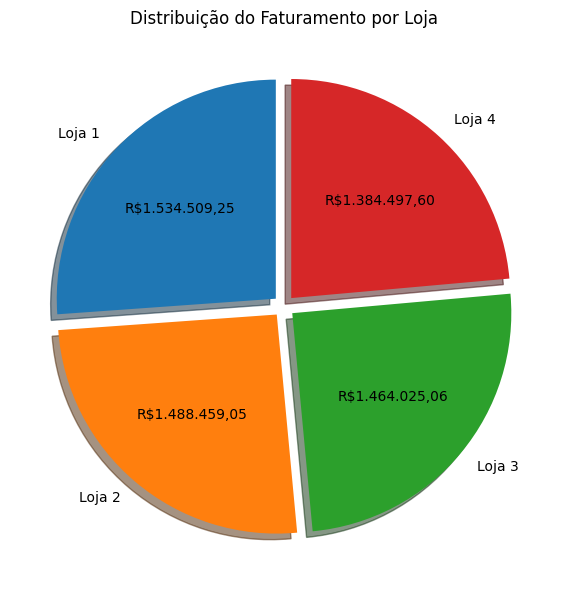

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]


plt.figure(figsize=(8, 6))
plt.pie(
    faturamentos,
    labels=lojas,
    autopct=lambda p: f'R${(p/100)*sum(faturamentos):,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
    startangle=90,
    shadow=True,
    explode=[0.05]*4
)

plt.title("Distribuição do Faturamento por Loja")
plt.tight_layout()
plt.show()



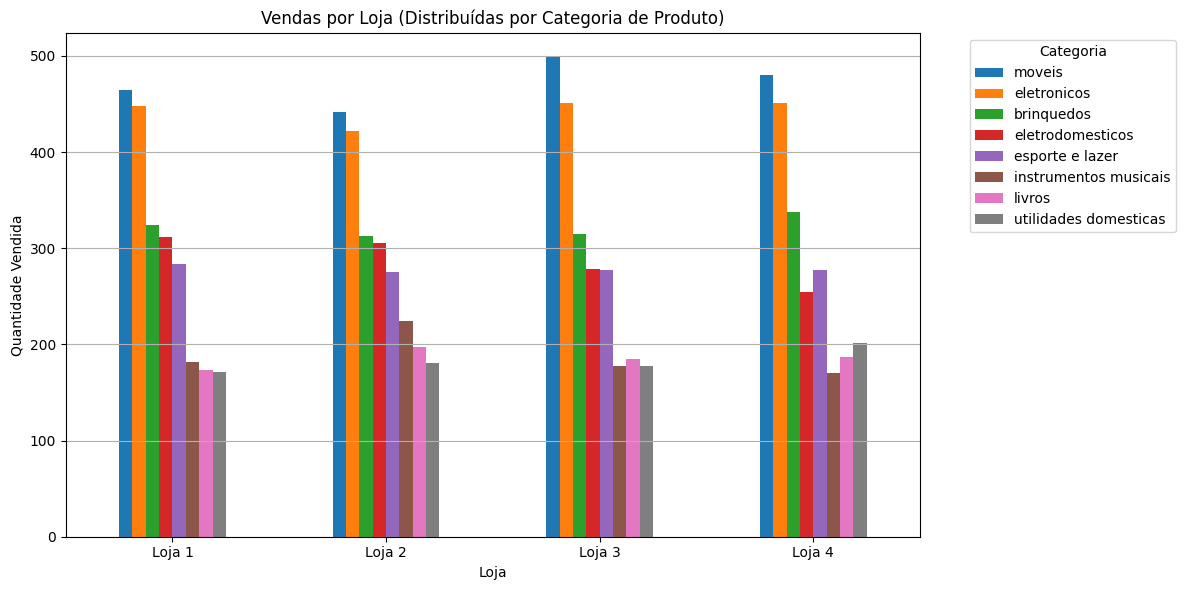

In [ ]:

vendas_por_categoria.T.plot(kind="bar", figsize=(12, 6))

plt.title("Vendas por Loja (Distribuídas por Categoria de Produto)")
plt.xlabel("Loja")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


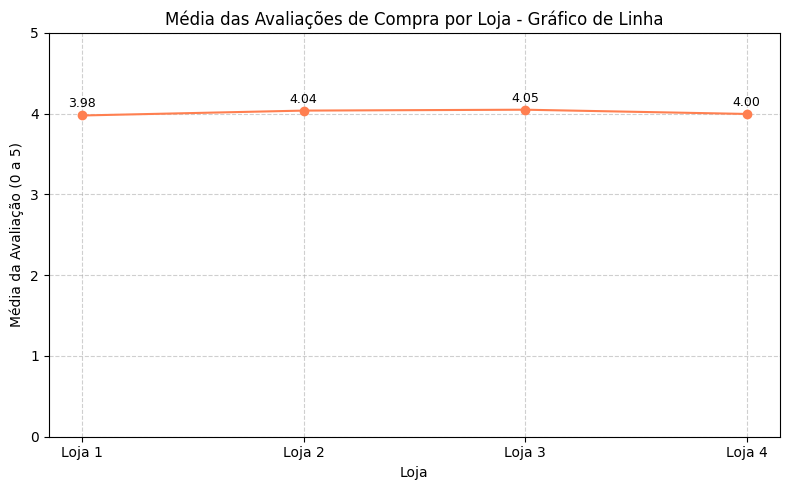

In [ ]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.figure(figsize=(8, 5))
plt.plot(lojas, avaliacoes, marker='o', linestyle='-', color='coral')

plt.title("Média das Avaliações de Compra por Loja - Gráfico de Linha")
plt.xlabel("Loja")
plt.ylabel("Média da Avaliação (0 a 5)")
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir valor em cada ponto
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.1, f"{nota:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

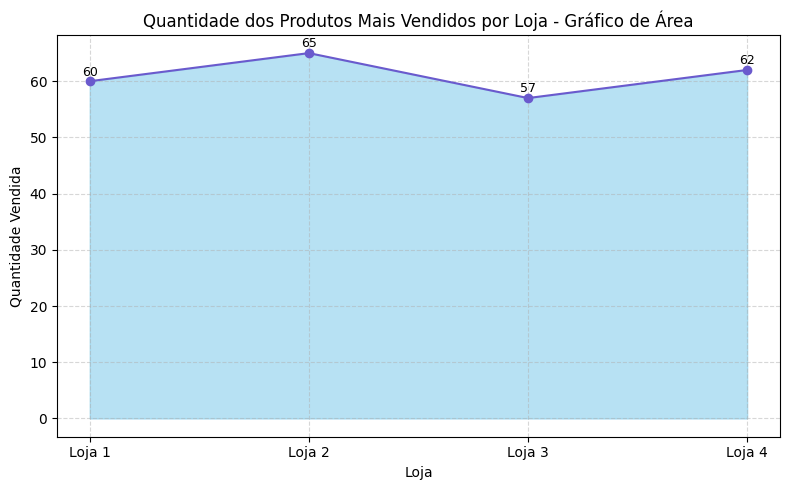

In [ ]:
lojas = tabela_mais_vendidos["Loja"]
quantidades = tabela_mais_vendidos["Quantidade"]

plt.figure(figsize=(8, 5))

plt.fill_between(lojas, quantidades, color='skyblue', alpha=0.6)
plt.plot(lojas, quantidades, color='Slateblue', marker='o')

plt.title("Quantidade dos Produtos Mais Vendidos por Loja - Gráfico de Área")
plt.xlabel("Loja")
plt.ylabel("Quantidade Vendida")
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir valor acima dos pontos
for i, qtd in enumerate(quantidades):
    plt.text(i, qtd + 1, str(qtd), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

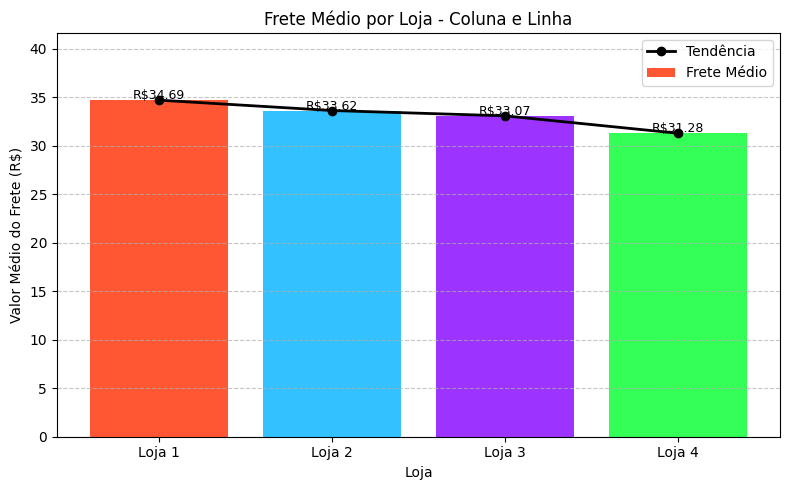

In [ ]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]


cores = ['#FF5733', '#33C1FF', '#9D33FF', '#33FF57']

plt.figure(figsize=(8, 5))

# Gráfico de barras com cores diferentes
plt.bar(lojas, fretes, color=cores, label='Frete Médio')

# Gráfico de linha (usar cor neutra ou média para não conflitar)
plt.plot(lojas, fretes, color='black', marker='o', linewidth=2, label='Tendência')

plt.title("Frete Médio por Loja - Coluna e Linha")
plt.xlabel("Loja")
plt.ylabel("Valor Médio do Frete (R$)")
plt.ylim(0, max(fretes) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Valores acima das barras
for i, v in enumerate(fretes):
    plt.text(i, v + 0.1, f"R${v:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Resumo Comparativo por Loja



| Indicador                              | Loja 1   | Loja 2  | Loja 3   | Loja 4     |
| -------------------------------------- | -------- | ------- | -------- | ---------- |
| **Quantidade total de vendas**         | ✅ Alta   | Média   | ✅ Alta   | ❌ Baixa    |
| **Produto mais vendido**               | Ok       | Ok      | Ok       | Limitado   |
| **Frete médio (R\$)**                  | Moderado | ✅ Baixo | Moderado | ❌ Alto     |
| **Avaliação média dos clientes**       | ✅ Alta   | Média   | ✅ Alta   | ❌ Baixa    |
| **Tendência de crescimento**           | Positiva | Neutra  | Positiva | ❌ Negativa |
| **Diversidade de categorias vendidas** | ✅ Alta   | Média   | ✅ Alta   | ❌ Baixa    |


Conclusão
Após análise dos dados:

Loja 4 apresenta os piores indicadores em praticamente todas as métricas:

Menor número de vendas

Menor diversidade de produtos vendidos

Avaliações baixas dos clientes

Frete mais caro

Tendência de queda nas vendas